In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("./Churn_Modelling.csv")
# df.head()
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.var()

/var/folders/tq/1dn18qvs46z75s3216p47sbm0000gn/T/ipykernel_1880/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


RowNumber          8.334167e+06
CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [7]:
df.describe(exclude=['float', 'int64'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# df.describe(include='category')

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [13]:
df.RowNumber=df.RowNumber.astype('category')
df.CustomerId=df.CustomerId.astype('category')
df.HasCrCard=df.HasCrCard.astype('category')
df.IsActiveMember=df.IsActiveMember.astype('category')
df.Exited=df.Exited.astype('category')
df.NumOfProducts=df.NumOfProducts.astype('category')
df.Geography = df.Geography.astype('category')
df.Surname = df.Surname.astype('category')
df.Gender = df.Gender.astype('category')

In [16]:
df.dtypes

RowNumber          category
CustomerId         category
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [17]:
df.describe(include='category')

,RowNumber,CustomerId,Surname,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,2932,3,2,4,2,2,2
top,1,15565701,Smith,France,Male,1,1,1,0
freq,1,1,32,5014,5457,5084,7055,5151,7963


In [19]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [22]:
type(df.Geography.value_counts())

pandas.core.series.Series

<AxesSubplot:>

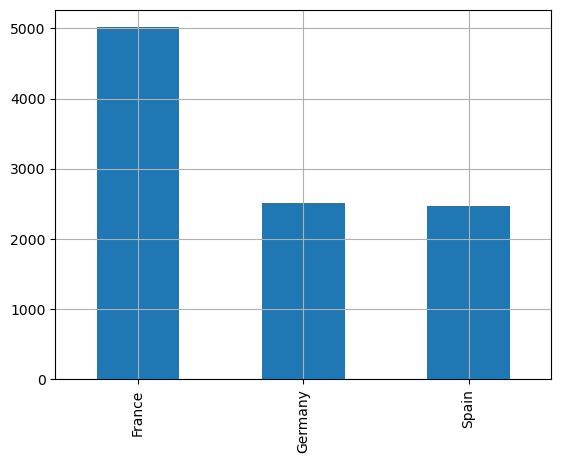

In [25]:
df.Geography.value_counts().plot.bar(grid=1)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

0 7963
79.63%
1 2037
20.37%


Text(0, 0.5, 'Count')

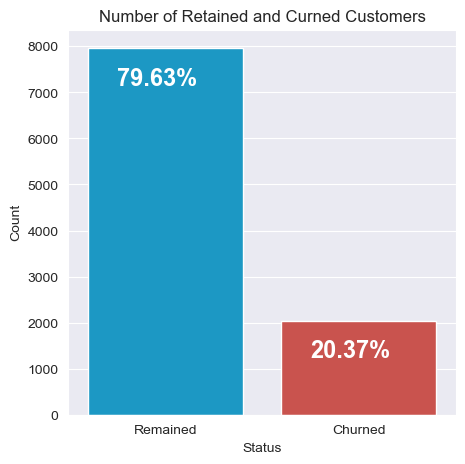

In [48]:
sns.set_style('darkgrid')
colors = ['#00a5e0', '#dd403a']

fig = plt.figure(figsize=[5,5])
sns.countplot(x='Exited', data=df, palette=colors)

for i, val in enumerate(df['Exited'].value_counts()):
    lb = '{}%'.format(
        round(val / df['Exited'].shape[0] * 100, 2
    ))
    plt.annotate(lb, xy=(i - .25, val - 800), 
                color='w',
                fontweight='bold',
                size=17)

    print(i, val)
    print(lb)
    
plt.title('Number of Retained and Curned Customers')
plt.xticks([0, 1], ['Remained', 'Churned'])
plt.xlabel("Status")
plt.ylabel('Count')

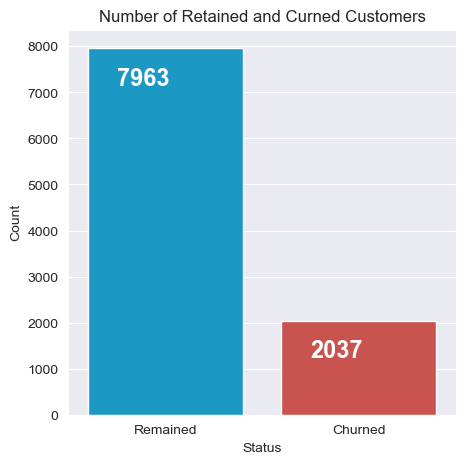

In [53]:
df['Exited'].shape
sns.set_style('darkgrid')
colors = ['#00a5e0', '#dd403a']

fig = plt.figure(figsize=[5,5])
sns.countplot(x='Exited', data=df, palette=colors)

for i, val in enumerate(df['Exited'].value_counts()):
    lb = '{}'.format( val )
    plt.annotate(lb, xy=(i - .25, val - 800), 
                color='w',
                fontweight='bold',
                size=17)
    
plt.title('Number of Retained and Curned Customers')
plt.xticks([0, 1], ['Remained', 'Churned'])
plt.xlabel("Status")
plt.ylabel('Count')

plt.show()

In [57]:
df.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [64]:
df.select_dtypes(include=['category']).columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

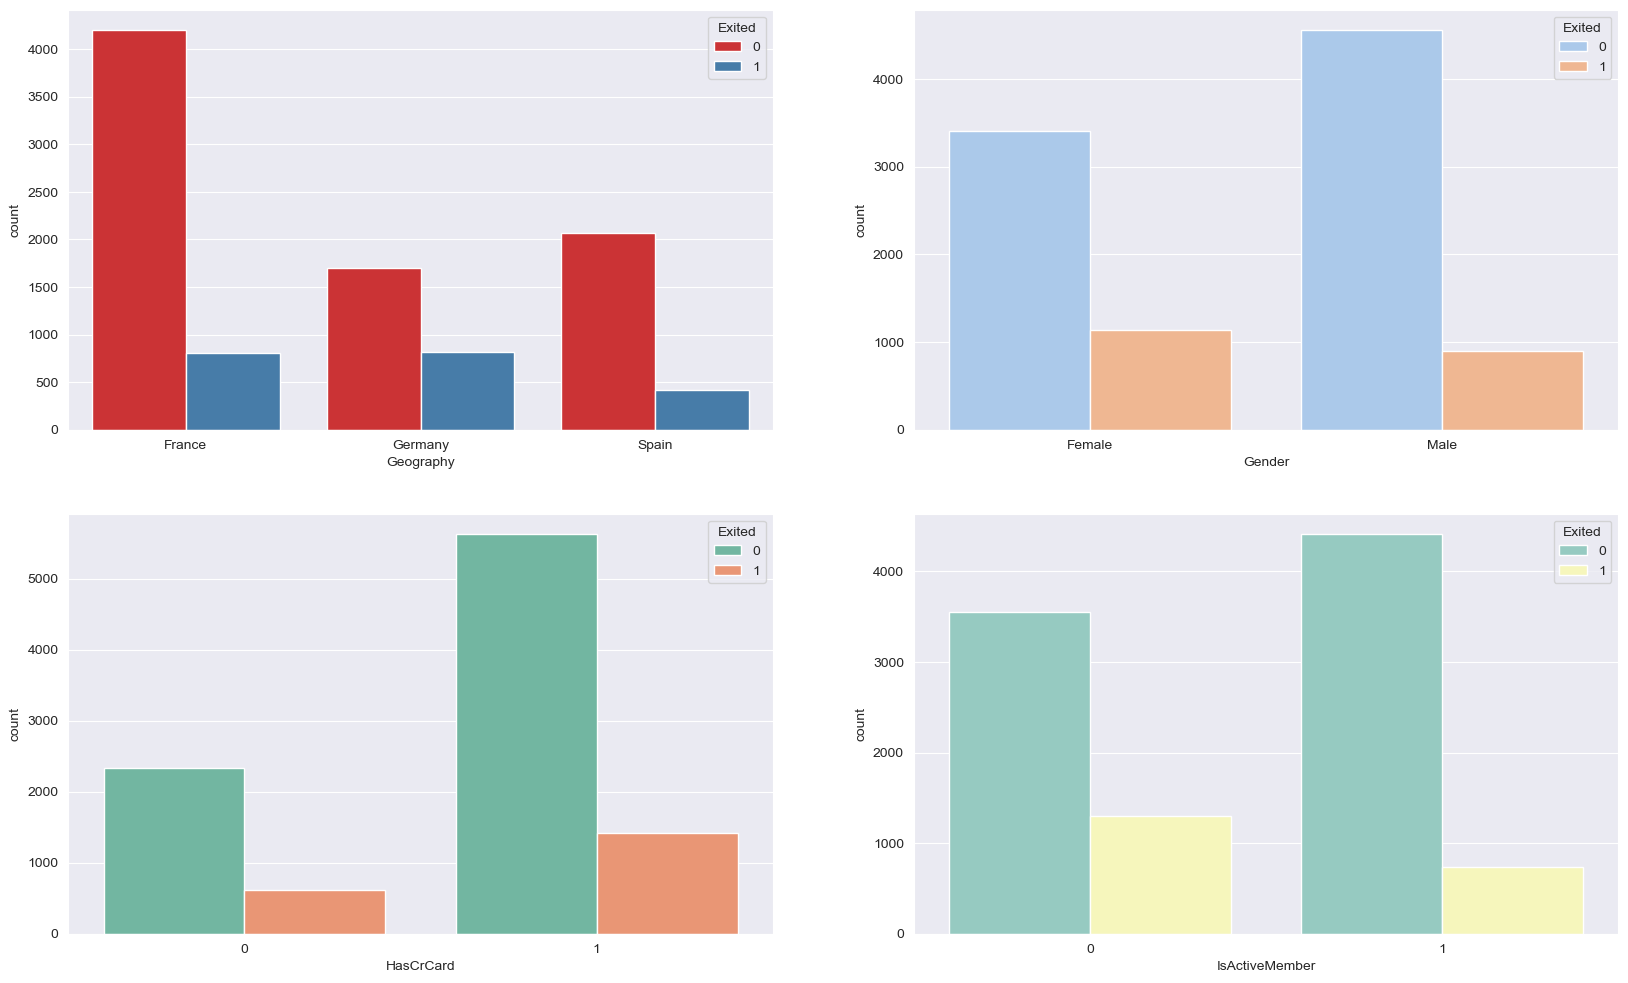

In [71]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

# cat_cols = df.select_dtypes(include=['category']).columns.tolist()
# for i, col in enumerate(cat_cols):
colors = ['Set1', 'pastel', 'Set2', 'Set3']
for i, col in enumerate(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']):
    sns.countplot(x=col, hue='Exited', data=df,
                  palette=colors[i],
                 ax=axarr[i // 2][i % 2])
# sns.

plt.savefig("4 plots")